In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score

In [ ]:
data = pd.read_csv("Obesitas.csv")

In [ ]:
data.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'NObeyesdad'], dtype='object')

In [ ]:
data.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'NObeyesdad'], dtype='object')

In [ ]:
data.head()

,Gender,Age,Height,Weight,NObeyesdad
0,Female,21.0,1.62,64.0,Normal_Weight
1,Female,21.0,1.52,56.0,Normal_Weight
2,Male,23.0,1.80,77.0,Normal_Weight
3,Male,27.0,1.80,87.0,Overweight_Level_I
4,Male,22.0,1.78,89.8,Overweight_Level_II


In [ ]:
data.shape

(2111, 5)

In [ ]:
#menampilkan info mengenai dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      2111 non-null   object 
 1   Age         2111 non-null   float64
 2   Height      2111 non-null   float64
 3   Weight      2111 non-null   float64
 4   NObeyesdad  2111 non-null   object 
dtypes: float64(3), object(2)
memory usage: 82.6+ KB


In [ ]:
data.isnull().sum()

Gender        0
Age           0
Height        0
Weight        0
NObeyesdad    0
dtype: int64

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2111.0,24.312600,6.345968,14.00,19.947192,22.777890,26.000000,61.00
Height,2111.0,1.701677,0.093305,1.45,1.630000,1.700499,1.768464,1.98
Weight,2111.0,86.586058,26.191172,39.00,65.473343,83.000000,107.430682,173.00


In [ ]:
data

,Gender,Age,Height,Weight,NObeyesdad
0,Female,21.000000,1.620000,64.000000,Normal_Weight
1,Female,21.000000,1.520000,56.000000,Normal_Weight
2,Male,23.000000,1.800000,77.000000,Normal_Weight
3,Male,27.000000,1.800000,87.000000,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,Overweight_Level_II
...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,Obesity_Type_III


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      2111 non-null   object 
 1   Age         2111 non-null   float64
 2   Height      2111 non-null   float64
 3   Weight      2111 non-null   float64
 4   NObeyesdad  2111 non-null   object 
dtypes: float64(3), object(2)
memory usage: 82.6+ KB


In [ ]:
data.isnull().sum()

Gender        0
Age           0
Height        0
Weight        0
NObeyesdad    0
dtype: int64

In [ ]:
data.shape

(2111, 5)

In [ ]:
data.drop_duplicates(inplace=True)
duplicatedValues = data.duplicated()
duplicatedValues.sum()

0

In [ ]:
#mengganti nama colums
data = data.rename(columns = {'NObeyesdad' : 'class_obecity'})

In [ ]:
data.head()

,Gender,Age,Height,Weight,class_obecity
0,Female,21.0,1.62,64.0,Normal_Weight
1,Female,21.0,1.52,56.0,Normal_Weight
2,Male,23.0,1.80,77.0,Normal_Weight
3,Male,27.0,1.80,87.0,Overweight_Level_I
4,Male,22.0,1.78,89.8,Overweight_Level_II


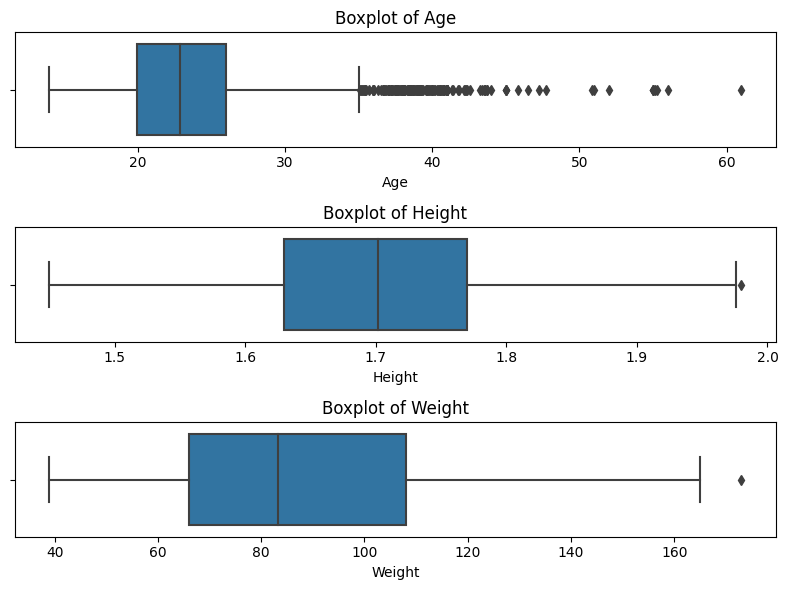

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# Drop non-numeric columns for the boxplot
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Set up subplots
fig, axes = plt.subplots(nrows=len(numeric_data.columns), ncols=1, figsize=(8, 2 * len(numeric_data.columns)))

# Plot boxplot for each numeric column
for i, column in enumerate(numeric_data.columns):
    sns.boxplot(x=data[column], ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

In [ ]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Identifikasi Outliers
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Hapus Outliers
data_cleaned = data[~((data < lower_bound) | (data > upper_bound)).any(axis=1)]

<ipython-input-18-bc94f7fda9ff>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = data.quantile(0.25)
<ipython-input-18-bc94f7fda9ff>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = data.quantile(0.75)
<ipython-input-18-bc94f7fda9ff>:10: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_cleaned = data[~((data < lower_bound) | (data > upper_bound)).any(axis=1)]


In [ ]:
print(f"Jumlah data sebelum penghapusan outliers: {len(data)}")
print(f"Jumlah data setelah penghapusan outliers: {len(data_cleaned)}")

Jumlah data sebelum penghapusan outliers: 2077
Jumlah data setelah penghapusan outliers: 1908


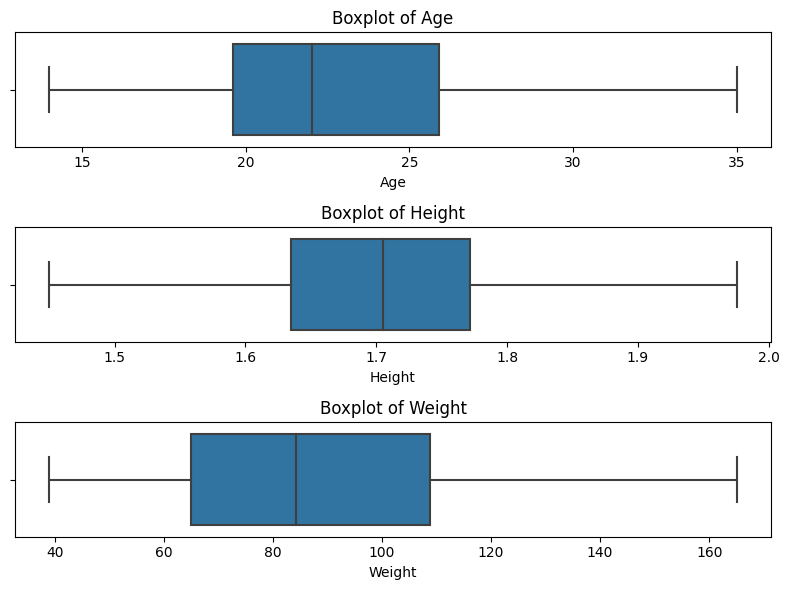

In [ ]:
numeric_data_cleaned = data_cleaned.select_dtypes(include=['float64', 'int64'])
fig, axes = plt.subplots(nrows=len(numeric_data_cleaned.columns), ncols=1, figsize=(8, 2 * len(numeric_data_cleaned.columns)))

for i, column in enumerate(numeric_data_cleaned.columns):
    sns.boxplot(x=data_cleaned[column], ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

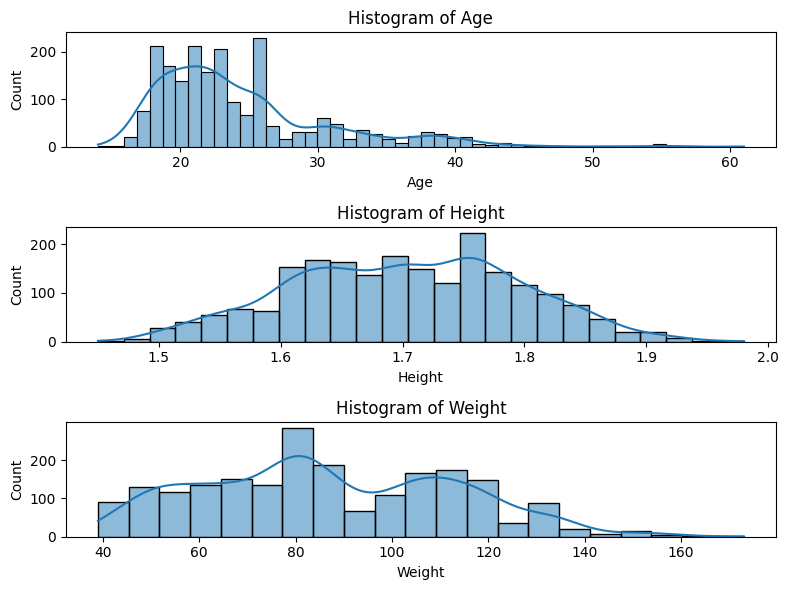

In [ ]:
# Assuming 'data' is your DataFrame
# Drop non-numeric columns for the histplot
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Set up subplots
fig, axes = plt.subplots(nrows=len(numeric_data.columns), ncols=1, figsize=(8, 2 * len(numeric_data.columns)))

# Plot histplot for each numeric column
for i, column in enumerate(numeric_data.columns):
    sns.histplot(data[column], ax=axes[i], kde=True)
    axes[i].set_title(f'Histogram of {column}')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

In [ ]:
data['class_obecity'].value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_II    289
Overweight_Level_I     276
Normal_Weight          275
Insufficient_Weight    265
Name: class_obecity, dtype: int64

In [ ]:
# creating X,y
X = pd.get_dummies(data.drop(['class_obecity'],axis=1),drop_first=True)
y = data['class_obecity']

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming X and y are your data and labels
# Choosing 15% as test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Instantiating StandardScaler
scale = StandardScaler()

In [ ]:
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Instantiating RandomForestClassifier
r_model = RandomForestClassifier()

In [ ]:
r_model.fit(X_train_scaled,y_train)

RandomForestClassifier()

In [ ]:
y_pred = r_model.predict(X_test_scaled)

In [ ]:
r_model.score(X_test_scaled,y_test)

0.96875

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

x = data.drop(columns=['class_obecity'])
y = data['class_obecity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi Model : {accuracy*100:.2f}%')

Akurasi Model : 97.60%


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Misalnya, Anda telah melatih model sebelumnya
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
# model = RandomForestClassifier()
# model.fit(X_train, y_train)

# Membuat DataFrame sample
sample = pd.DataFrame({'Gender': ['Male'], 'Age': [21], 'Height': [1.78], 'Weight': [55.0]})

# Melakukan prediksi menggunakan model yang telah dilatih
predicted_crop = model.predict(X_test)

# Menampilkan hasil prediksi
print(f'Termasuk ke dalam kategori: {predicted_crop[0]}')

Termasuk ke dalam kategori: Overweight_Level_I


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Misalnya, Anda telah melatih model sebelumnya
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
# model = RandomForestClassifier()
# model.fit(X_train, y_train)

# Membuat DataFrame sample dengan data input yang berbeda
sample = pd.DataFrame({'Gender': ['Famale'], 'Age': [16], 'Height': [1.30], 'Weight': [75.0]})

# Melakukan prediksi menggunakan model yang telah dilatih
predicted_crop = model.predict(X_test)

# Menampilkan hasil prediksi
print(f'Termasuk ke dalam kategori: {predicted_crop[0]}')

Termasuk ke dalam kategori: Overweight_Level_I


In [ ]:
# Membuat DataFrame sample
sample = pd.DataFrame({'Gender': ['Female'], 'Age': [21.0], 'Height': [1.62], 'Weight': [64.0]})

# Menambahkan kolom 'Gender_Male' sesuai dengan kondisi yang sesuai
sample['Gender_Male'] = 1 if sample['Gender'][0] == 'Male' else 0

# Hapus kolom 'Gender' jika tidak diperlukan lagi
sample.drop('Gender', axis=1, inplace=True)

# Melakukan prediksi menggunakan model yang telah dilatih pada data sample
predicted_crop = model.predict(sample)

# Menampilkan hasil prediksi
print(f'Termasuk ke dalam kategori: {predicted_crop[0]}')

Termasuk ke dalam kategori: Normal_Weight


In [ ]:
# Membuat DataFrame sample
sample = pd.DataFrame({'Gender': ['Male'], 'Age': [22], 'Height': [1.75], 'Weight': [110]})

# Menambahkan kolom 'Gender_Male' sesuai dengan kondisi yang sesuai
sample['Gender_Male'] = 1 if sample['Gender'][0] == 'Male' else 0

# Hapus kolom 'Gender' jika tidak diperlukan lagi
sample.drop('Gender', axis=1, inplace=True)

# Melakukan prediksi menggunakan model yang telah dilatih pada data sample
predicted_crop = model.predict(sample)

# Menampilkan hasil prediksi
print(f'Termasuk ke dalam kategori: {predicted_crop[0]}')

Termasuk ke dalam kategori: Obesity_Type_I
